Synthetic datasets: 40 rows
Available scenarios: ['A' 'B' 'C' 'D']
DataFrame shape: (40, 37)
Available columns: ['model_name', 'iteration', 'random_seed', 'f1', 'accuracy', 'threshold', 'y_prob', 'y_pred', 'coefficients', 'n_selected', 'selection', 'hyperparams', 'training_time', 'data_type', 'dataset_id', 'dataset_description', 'n_features_total', 'n_test_samples', 'n_pool_samples', 'scenario', 'scenario_description', 'scenario_title', 'n_true_features', 'true_support', 'beta_true', 'selected_features', 'method_has_selection', 'best_lambda', 'best_cv_score', 'best_f1', 'best_threshold', 'decomposition_val', 'decomposition_test', 'correction_stats_val', 'no_harm_val', 'training', 'feature_importances']

Models: ['lasso', 'lassonet', 'nimo', 'random_forest', 'neural_net']
Scenarios: ['A', 'B', 'C', 'D']
Iterations: [0 1]

SYNTHETIC DATASET ANALYSIS

Scenario A: Linear (low-dim, 20 features)
  Iterations: 10
  True support: [0, 1, 2, 3, 4]
  True beta (non-zero): [2.0, -3.0, 2.0, -2.0, 3

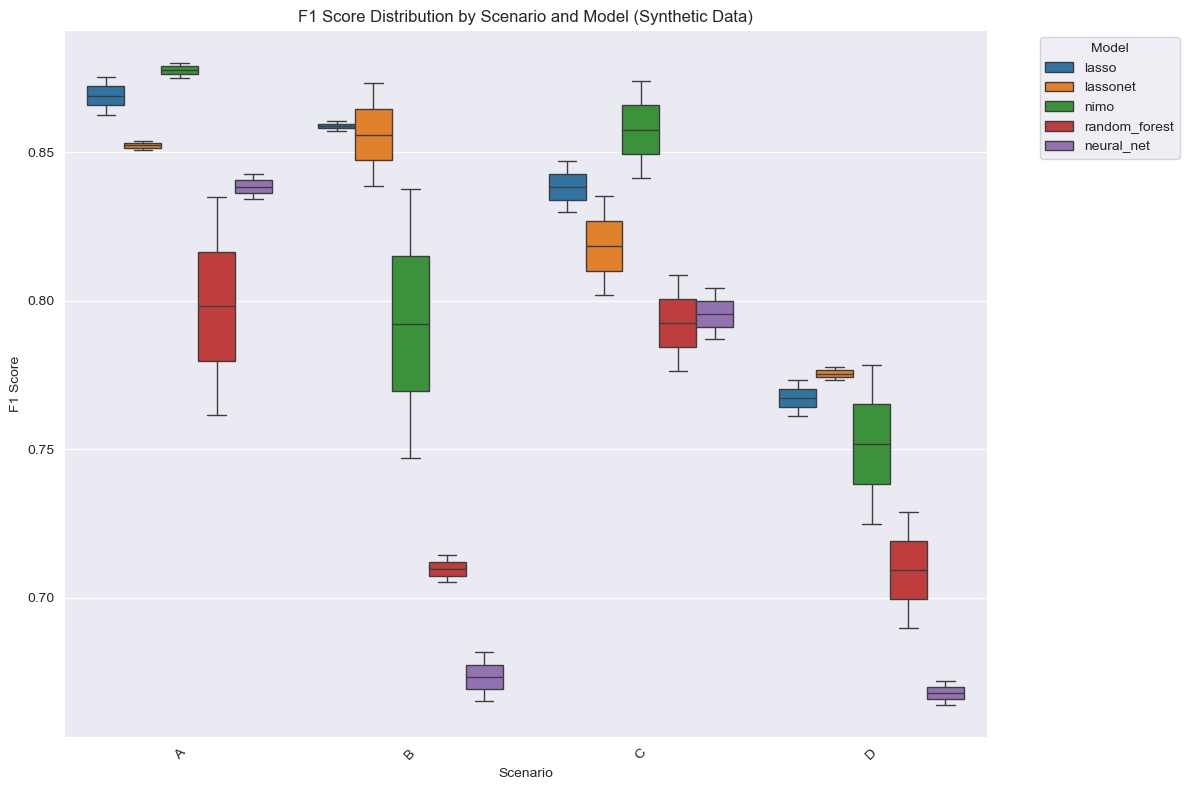

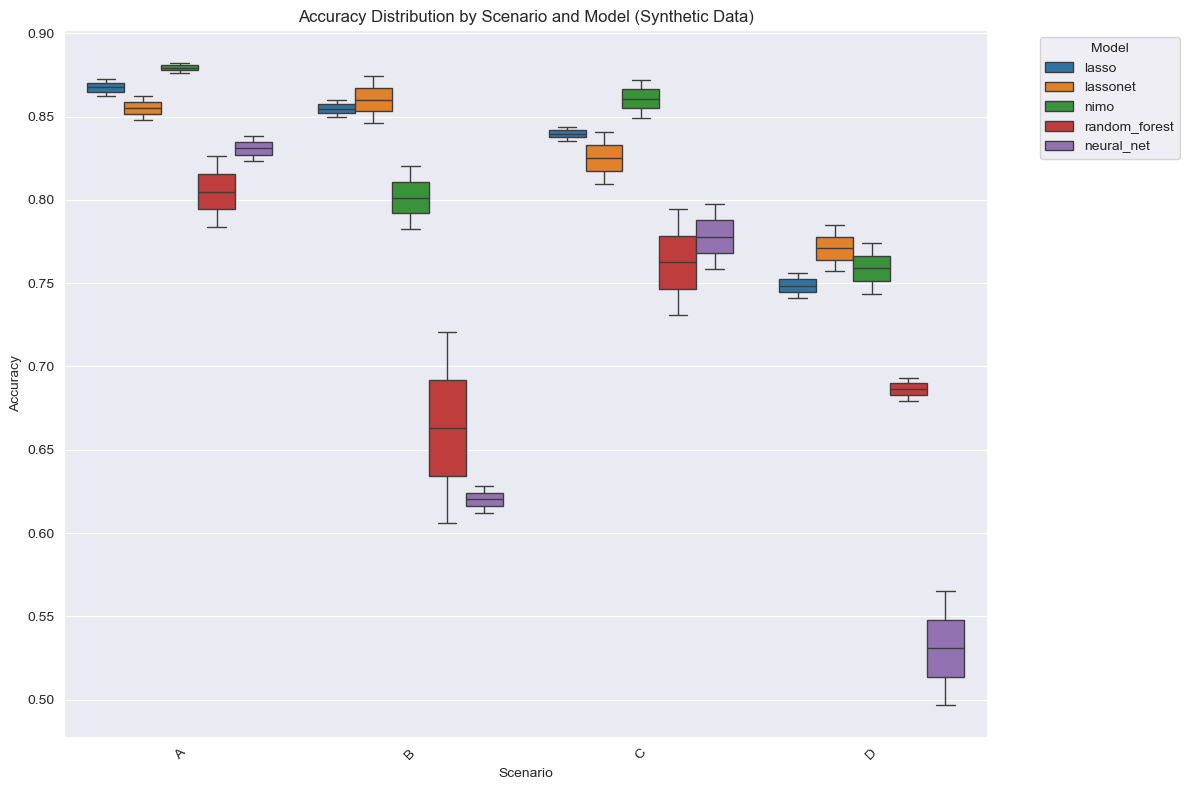

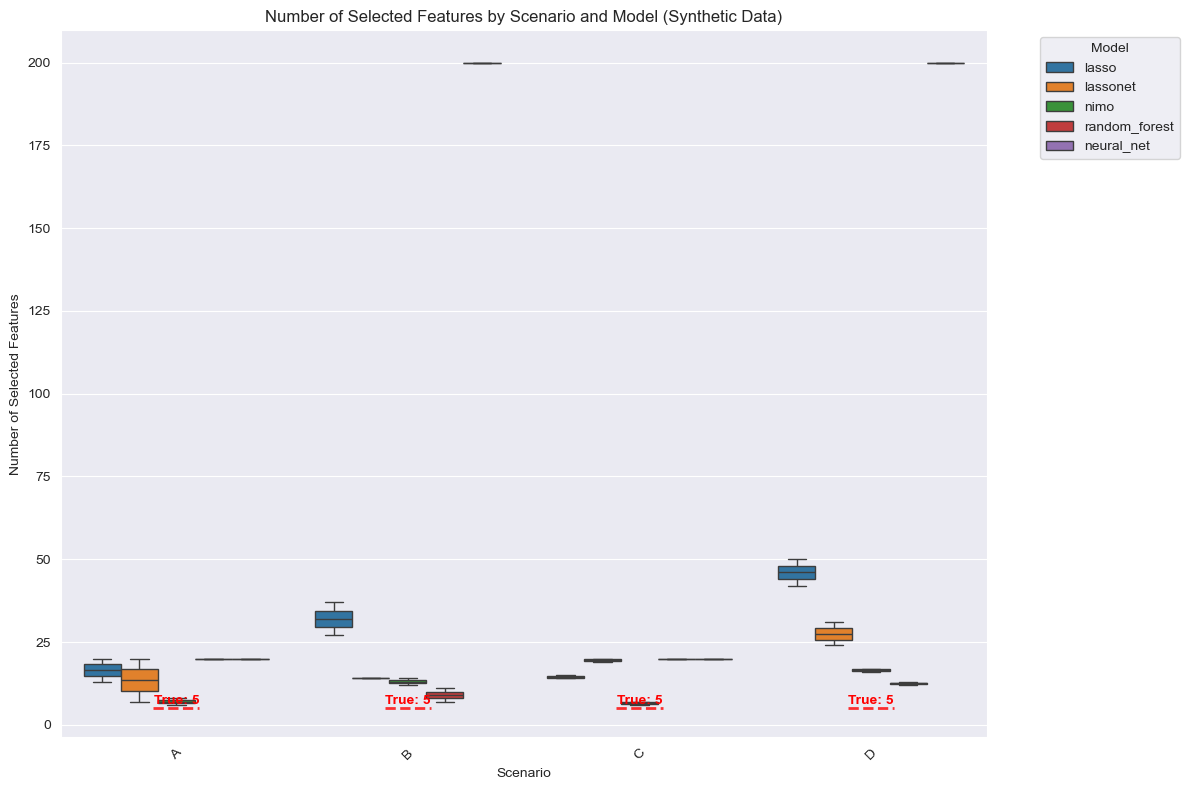

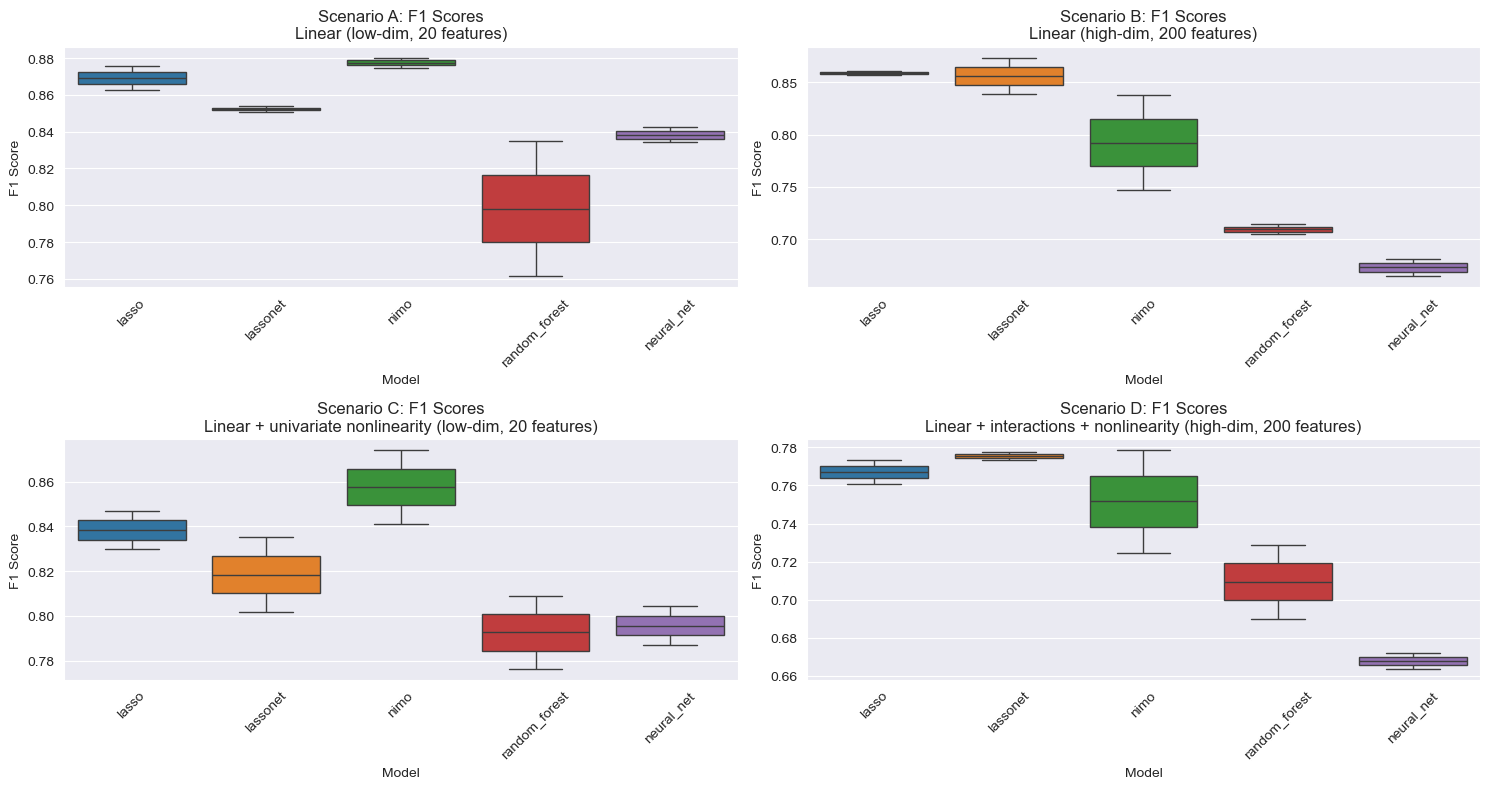

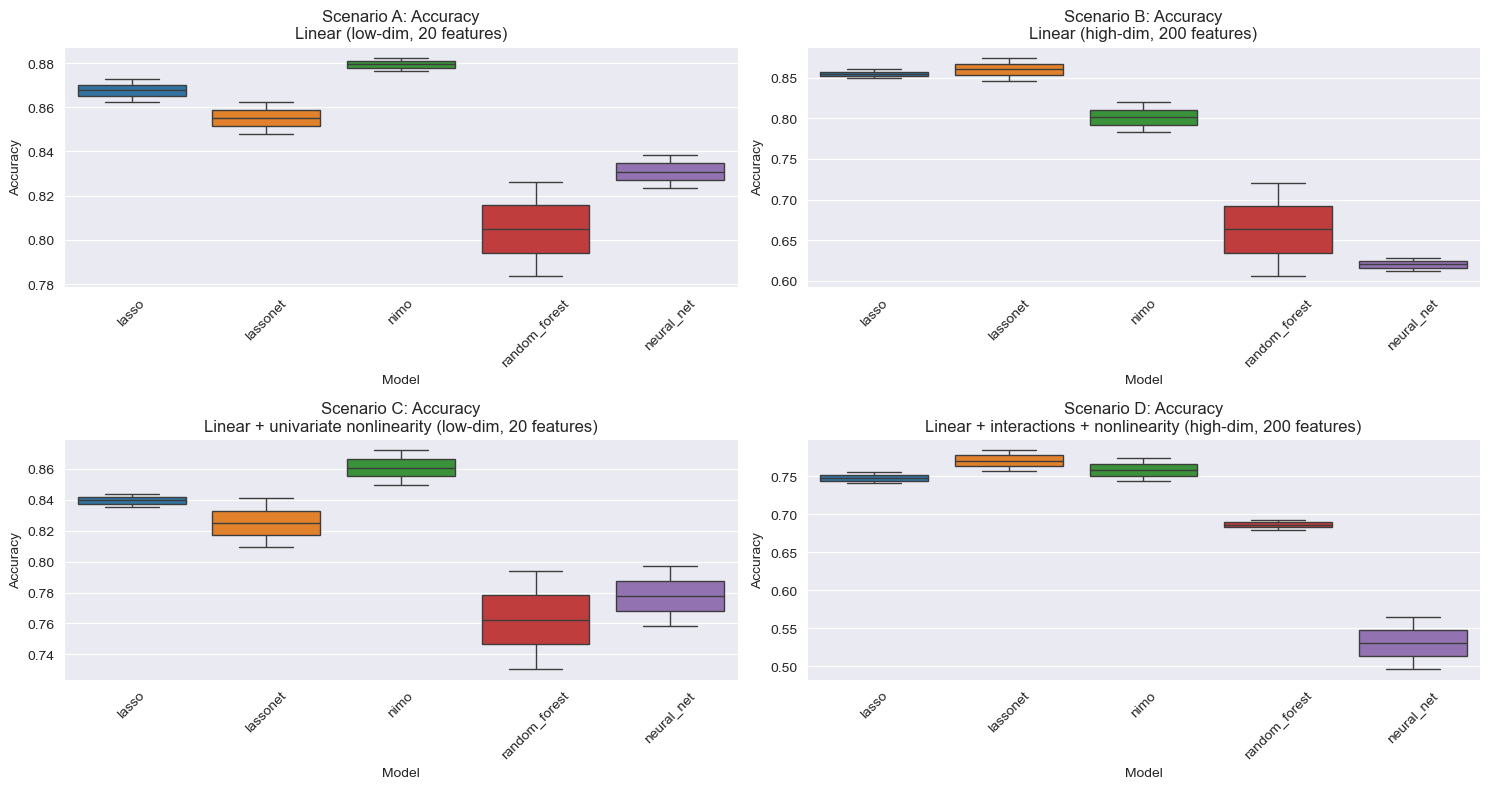

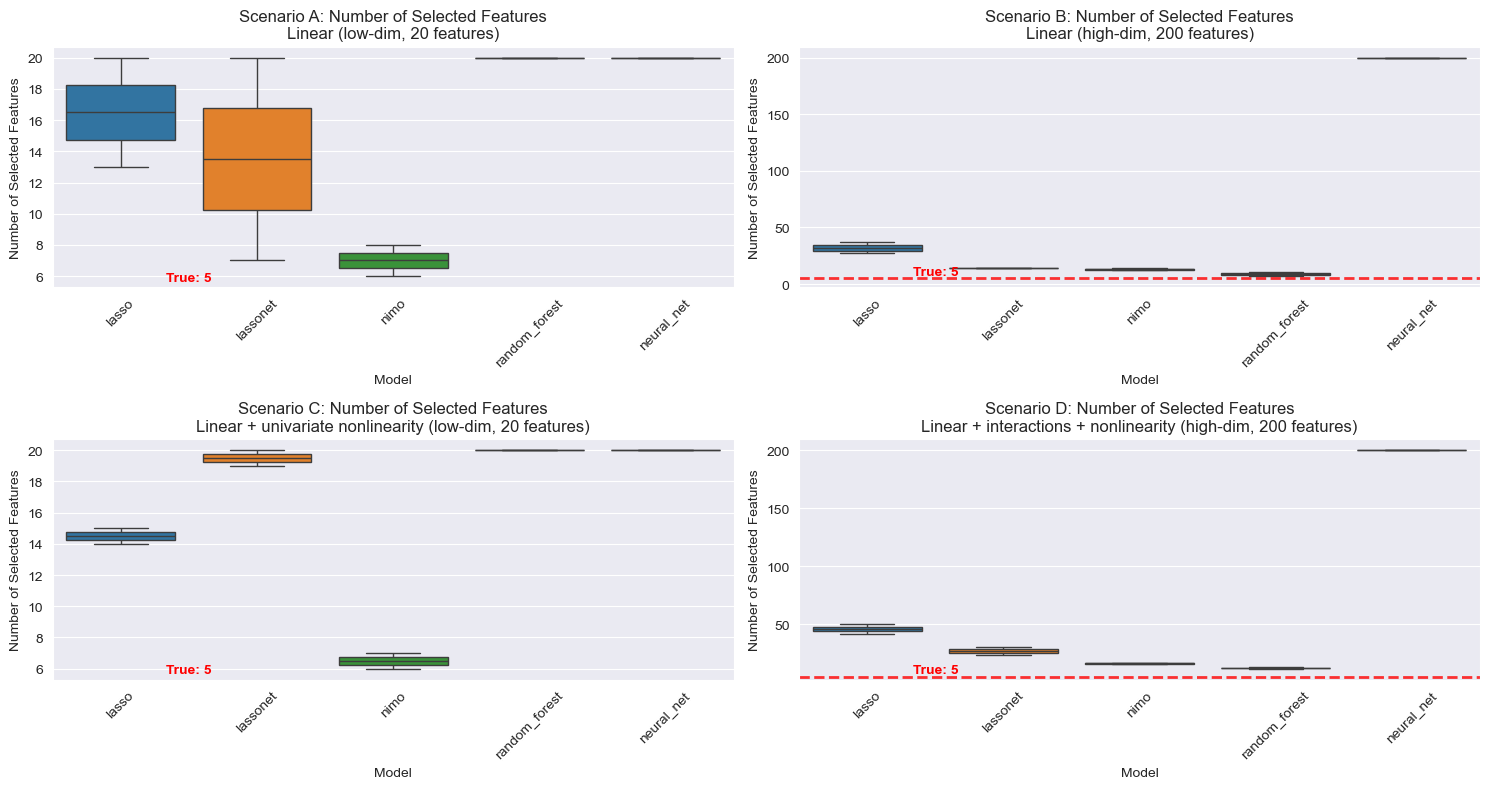


COEFFICIENT ANALYSIS WITH GROUND TRUTH


TypeError: the JSON object must be str, bytes or bytearray, not float

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the unified pipeline results
df = pd.read_csv('../../results/all/experiment_results.csv')

# Filter for synthetic datasets only
df_synthetic = df[df['data_type'] == 'synthetic'].copy()

print(f"Synthetic datasets: {df_synthetic.shape[0]} rows")
print(f"Available scenarios: {df_synthetic['scenario'].unique()}")

# Data preparation
df_synthetic['f1'] = pd.to_numeric(df_synthetic['f1'], errors='coerce')
df_synthetic['accuracy'] = pd.to_numeric(df_synthetic['accuracy'], errors='coerce')
df_synthetic['n_selected'] = pd.to_numeric(df_synthetic['n_selected'], errors='coerce')

print(f"DataFrame shape: {df_synthetic.shape}")
print(f"Available columns: {df_synthetic.columns.tolist()}")
print()

# Define models and colors
MODELS = df_synthetic['model_name'].unique().tolist()
PALETTE = {model: f'C{i}' for i, model in enumerate(MODELS)}

print(f"Models: {MODELS}")

# Scenario order (synthetic only)
scenario_order = ['A', 'B', 'C', 'D']
scenario_order = [s for s in scenario_order if s in df_synthetic['scenario'].unique()]

print(f"Scenarios: {scenario_order}")
print(f"Iterations: {df_synthetic['iteration'].unique()}")
print()

# Scenario Analysis
print("=" * 80)
print("SYNTHETIC DATASET ANALYSIS")
print("=" * 80)

for scen in scenario_order:
    scen_data = df_synthetic[df_synthetic['scenario'] == scen]
    desc = scen_data['scenario_description'].iloc[0]

    print(f"\nScenario {scen}: {desc}")
    print(f"  Iterations: {len(scen_data)}")

    # Parse true support and beta for synthetic data
    try:
        true_support = json.loads(scen_data['true_support'].iloc[0])
        beta_true = json.loads(scen_data['beta_true'].iloc[0])
        print(f"  True support: {true_support}")
        print(f"  True beta (non-zero): {[beta_true[i] for i in range(len(beta_true))]}")
    except:
        print(f"  True support info not available")

# F1 Score Distribution
print("\n" + "=" * 80)
print("F1 SCORE DISTRIBUTION")
print("=" * 80)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_synthetic, x='scenario', y='f1', hue='model_name', palette=PALETTE)
plt.title('F1 Score Distribution by Scenario and Model (Synthetic Data)')
plt.xlabel('Scenario')
plt.ylabel('F1 Score')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Accuracy Distribution
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_synthetic, x='scenario', y='accuracy', hue='model_name', palette=PALETTE)
plt.title('Accuracy Distribution by Scenario and Model (Synthetic Data)')
plt.xlabel('Scenario')
plt.ylabel('Accuracy')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of Selected Features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_synthetic, x='scenario', y='n_selected', hue='model_name', palette=PALETTE)
plt.title('Number of Selected Features by Scenario and Model (Synthetic Data)')
plt.xlabel('Scenario')
plt.ylabel('Number of Selected Features')

# Add ground truth reference lines
for i, scen in enumerate(scenario_order):
    # Get true number of features for this scenario
    scen_data = df_synthetic[df_synthetic['scenario'] == scen]
    true_support = json.loads(scen_data['true_support'].iloc[0])
    n_true_features = len(true_support)
    
    # Add horizontal line for ground truth
    plt.axhline(y=n_true_features, xmin=i/len(scenario_order) + 0.1, xmax=(i+1)/len(scenario_order) - 0.1, 
                color='red', linestyle='--', linewidth=2, alpha=0.8)
    
    # Add text label for ground truth
    plt.text(i, n_true_features + 0.5, f'True: {n_true_features}', 
             ha='center', va='bottom', fontsize=10, color='red', fontweight='bold')

plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# F1 Scores by Scenario (individual plots)
n_scenarios = len(scenario_order)
n_cols = 2
n_rows = (n_scenarios + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_scenarios == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes.reshape(1, -1)

for i, scen in enumerate(scenario_order):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    scen_data = df_synthetic[df_synthetic['scenario'] == scen]
    desc = scen_data['scenario_description'].iloc[0]
    
    sns.boxplot(data=scen_data, x='model_name', y='f1', palette=PALETTE, ax=ax, hue='model_name')
    ax.set_title(f'Scenario {scen}: F1 Scores\n{desc}')
    ax.set_xlabel('Model')
    ax.set_ylabel('F1 Score')
    
    # Dynamic y-axis for better visualization
    f1_values = scen_data['f1'].dropna()
    if len(f1_values) > 0:
        min_val = f1_values.min()
        max_val = f1_values.max()
        if max_val > min_val:
            padding = (max_val - min_val) * 0.05
            ax.set_ylim(min_val - padding, max_val + padding)
        else:
            ax.set_ylim(min_val - 0.01, min_val + 0.01)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(n_scenarios, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

# Accuracy by Scenario (individual plots)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_scenarios == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes.reshape(1, -1)

for i, scen in enumerate(scenario_order):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    scen_data = df_synthetic[df_synthetic['scenario'] == scen]
    desc = scen_data['scenario_description'].iloc[0]
    
    sns.boxplot(data=scen_data, x='model_name', y='accuracy', palette=PALETTE, ax=ax, hue='model_name')
    ax.set_title(f'Scenario {scen}: Accuracy\n{desc}')
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    
    # Dynamic y-axis for better visualization
    acc_values = scen_data['accuracy'].dropna()
    if len(acc_values) > 0:
        min_val = acc_values.min()
        max_val = acc_values.max()
        if max_val > min_val:
            padding = (max_val - min_val) * 0.05
            ax.set_ylim(min_val - padding, max_val + padding)
        else:
            ax.set_ylim(min_val - 0.01, min_val + 0.01)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(n_scenarios, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

# Number of Selected Features by Scenario (individual plots)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_scenarios == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes.reshape(1, -1)

for i, scen in enumerate(scenario_order):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    scen_data = df_synthetic[df_synthetic['scenario'] == scen]
    desc = scen_data['scenario_description'].iloc[0]
    
    sns.boxplot(data=scen_data, x='model_name', y='n_selected', palette=PALETTE, ax=ax, hue='model_name')
    ax.set_title(f'Scenario {scen}: Number of Selected Features\n{desc}')
    ax.set_xlabel('Model')
    ax.set_ylabel('Number of Selected Features')
    
    # Add ground truth reference line
    true_support = json.loads(scen_data['true_support'].iloc[0])
    n_true_features = len(true_support)
    ax.axhline(y=n_true_features, color='red', linestyle='--', linewidth=2, alpha=0.8, label=f'True: {n_true_features}')
    
    # Add text label for ground truth
    ax.text(0.5, n_true_features + 0.5, f'True: {n_true_features}', 
            ha='center', va='bottom', fontsize=10, color='red', fontweight='bold', 
            transform=ax.transData)
    
    # Dynamic y-axis for better visualization
    n_sel_values = scen_data['n_selected'].dropna()
    if len(n_sel_values) > 0:
        min_val = n_sel_values.min()
        max_val = n_sel_values.max()
        if max_val > min_val:
            padding = (max_val - min_val) * 0.05
            ax.set_ylim(min_val - padding, max_val + padding)
        else:
            ax.set_ylim(min_val - 0.01, min_val + 0.01)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(n_scenarios, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

# Helper function to convert raw beta to standardized space
def raw_to_std(beta_raw, b0_raw, mu, s, true_support=None):
    """Convert raw beta to standardized space for comparison."""
    beta_raw = np.asarray(beta_raw, float)
    mu = np.asarray(mu, float)
    s = np.asarray(s, float)
    
    # If true_support is provided, we need to map the beta values to the full feature space
    if true_support is not None and len(beta_raw) < len(mu):
        # Create full beta vector with zeros for non-true features
        beta_full = np.zeros(len(mu))
        beta_full[true_support] = beta_raw
        beta_raw = beta_full
    
    beta_std = s * beta_raw                     # elementwise
    b0_std = b0_raw + float(np.dot(mu, beta_raw))
    return beta_std, b0_std

# Coefficient Analysis (with ground truth) - Bar plots with error bars
print("\n" + "=" * 80)
print("COEFFICIENT ANALYSIS WITH GROUND TRUTH")
print("=" * 80)

TOPK = 20  # Number of top features to show

for scen in scenario_order:
    # Get the first row to extract true beta (same for all iterations in a scenario)
    row = df_synthetic[df_synthetic["scenario"] == scen].iloc[0]
    beta_true_raw = json.loads(row["beta_true"])
    true_support = json.loads(row["true_support"])
    b0_true_raw = 0.0  # Default intercept

    p = len(beta_true_raw)
    
    # Instead of just true importance, show features that are either:
    # 1. True features (important for ground truth comparison)
    # 2. Features selected by at least one model (important for model comparison)
    
    # Get features selected by any model
    model_selected_features = set()
    for m in MODELS:
        sub = df_synthetic[(df_synthetic["scenario"] == scen) & (df_synthetic["model_name"] == m)]
        if len(sub) > 0:
            coefs_dict = json.loads(sub.iloc[0]["coefficients"])
            coefs = coefs_dict.get("values", [])
            if coefs:
                non_zero_idx = np.where(np.array(coefs) != 0)[0]
                model_selected_features.update(non_zero_idx)
    
    # Combine true features with model-selected features
    all_important_features = set(true_support) | model_selected_features
    all_important_features = sorted(list(all_important_features))
    
    # Take top features, prioritizing true features first
    true_features_first = true_support + [f for f in all_important_features if f not in true_support]
    top_idx = true_features_first[:min(TOPK, len(true_features_first))]
    
    labels = [f"f{j}" for j in top_idx]
    
    print(f"\\nScenario {scen}:")
    print(f"  True features: {true_support}")
    print(f"  Features selected by any model: {sorted(list(model_selected_features))}")
    print(f"  Features: {labels}")

    # Collect coefficients from ALL iterations for error bar calculation
    all_coefs = {model: [] for model in MODELS}
    beta_true_std = None  # Will be computed once using the first model's scaler
    b0_true_std = None

    for m in MODELS:
        sub = df_synthetic[(df_synthetic["scenario"] == scen) & (df_synthetic["model_name"] == m)]
        if len(sub) == 0:
            continue
            
        for _, model_row in sub.iterrows():
            try:
                coefs_dict = json.loads(model_row["coefficients"])
                coefs = coefs_dict.get("values", [])
                mu = coefs_dict.get("mean", np.zeros(p))
                s = coefs_dict.get("scale", np.ones(p))
                
                # Convert true beta to standardized space using this model's scaler
                if beta_true_std is None:
                    beta_true_std, b0_true_std = raw_to_std(beta_true_raw, b0_true_raw, mu, s, true_support)

                if coefs and len(coefs) == len(mu):
                    coefs_array = np.array(coefs)[top_idx]
                    all_coefs[m].append(coefs_array)
                    
            except Exception as e:
                print(f"Warning: Could not parse coefficients for {m}: {e}")
                continue

    # Calculate means and standard errors for each model
    model_means = {}
    model_stds = {}
    
    for m in MODELS:
        if len(all_coefs[m]) > 0:
            coefs_matrix = np.array(all_coefs[m])  # Shape: (n_iterations, n_features)
            model_means[m] = np.mean(coefs_matrix, axis=0)
            model_stds[m] = np.std(coefs_matrix, axis=0)
        else:
            print(f"Warning: No valid coefficients for {m} in scenario {scen}")

    # Plot coefficient comparison if we have valid data
    if beta_true_std is not None and len(model_means) > 0:
        plt.figure(figsize=(14, 8))
        
        x = np.arange(len(labels))
        width = 0.35  # Width of bars
        
        # True coefficients (standardized) - as horizontal line
        beta_true_top = beta_true_std[top_idx]
        plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
        
        # Plot bars for each model
        for i, (model, means) in enumerate(model_means.items()):
            stds = model_stds[model]
            x_pos = x + i * width - width/2  # Offset bars
            bars = plt.bar(x_pos, means, width, 
                          label=f'{model}', 
                          color=PALETTE[model], 
                          alpha=0.8,
                          yerr=stds, 
                          capsize=5,
                          error_kw={'elinewidth': 1, 'capthick': 1})
        
        # Add true coefficients as red circles (outside the loop!)
        plt.scatter(x, beta_true_top, 
                   color='red', s=150, marker='o', 
                   label='True (Standardized)', zorder=10, linewidth=2)
        
        plt.xlabel('Features (True + Model-Selected)')
        plt.ylabel('Coefficient Value (Standardized)')
        plt.title(f'Scenario {scen}: Coefficient Comparison with Error Bars\n(True + Model-Selected Features)')
        plt.xticks(x, labels, rotation=45)
        plt.legend()
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        
        # Find best iteration for each model
        best_iterations = {}
        for m in MODELS:
            sub = df_synthetic[(df_synthetic["scenario"] == scen) & (df_synthetic["model_name"] == m)]
            if len(sub) > 0:
                f1_scores = sub['f1'].dropna()
                if len(f1_scores) > 0:
                    best_idx = f1_scores.idxmax()
                    best_iterations[m] = sub.loc[best_idx]
                else:
                    best_iterations[m] = sub.iloc[0]  # Fallback to first iteration
        
        # Best Iteration Coefficient Comparison (for this scenario)
        print(f"\n--- SCENARIO {scen} - BEST ITERATION COEFFICIENTS ---")
        
        # Print true coefficients (ground truth) for first 5 features
        print(f"TRUE COEFFICIENTS (Ground Truth) - First 5 features:")
        true_coefs_first5 = [beta_true_raw[i] for i in true_support[:5]]
        true_features_first5 = [f"f{i}" for i in true_support[:5]]
        for i, (feat, coef) in enumerate(zip(true_features_first5, true_coefs_first5)):
            print(f"  {feat}: {coef:.3f}")
        
        # Get coefficients from best iterations
        best_coefs = {}
        best_feature_labels = None
        
        for m in MODELS:
            if m in best_iterations:
                best_iter = best_iterations[m]
                try:
                    coefs_dict = json.loads(best_iter["coefficients"])
                    coefs = coefs_dict.get("values", [])
                    if coefs and len(coefs) > 0:
                        coefs_array = np.array(coefs)
                        # Get top features by absolute coefficient value
                        abs_coefs = np.abs(coefs_array)
                        top_idx = np.argsort(abs_coefs)[::-1][:min(15, len(coefs_array))]
                        
                        best_coefs[m] = coefs_array[top_idx]
                        
                        if best_feature_labels is None:
                            best_feature_labels = [f"f{i}" for i in top_idx]
                        
                        print(f"{m.upper()}: Best iteration {best_iter['iteration']} (F1: {best_iter['f1']:.3f}) - {np.sum(coefs_array != 0)} features selected")
                except Exception as e:
                    print(f"Warning: Could not parse coefficients for {m}: {e}")
        
        # Print coefficient values for first 5 true features for LASSO and NIMO
        print(f"\nCOEFFICIENT VALUES - First 5 true features:")
        for m in ['lasso', 'nimo']:  # Only LASSO and NIMO as requested
            if m in best_iterations:
                best_iter = best_iterations[m]
                try:
                    coefs_dict = json.loads(best_iter["coefficients"])
                    coefs = coefs_dict.get("values", [])
                    if coefs and len(coefs) > 0:
                        coefs_array = np.array(coefs)
                        print(f"{m.upper()}:")
                        for i in true_support[:5]:  # First 5 true features
                            if i < len(coefs_array):
                                print(f"  f{i}: {coefs_array[i]:.3f}")
                            else:
                                print(f"  f{i}: 0.000 (not in model)")
                except Exception as e:
                    print(f"Warning: Could not parse coefficients for {m}: {e}")
        
        # Plot best iteration coefficients if we have data
        if len(best_coefs) > 0 and best_feature_labels is not None:
            plt.figure(figsize=(14, 8))
            
            x = np.arange(len(best_feature_labels))
            width = 0.35
            
            plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
            
            # Calculate true coefficients in standardized space for the first model
            true_coefs_std = None
            if len(best_coefs) > 0:
                first_model = list(best_coefs.keys())[0]
                first_iter = best_iterations[first_model]
                try:
                    coefs_dict = json.loads(first_iter["coefficients"])
                    mu = coefs_dict.get("mean", np.zeros(len(best_feature_labels)))
                    s = coefs_dict.get("scale", np.ones(len(best_feature_labels)))
                    
                    # Convert true beta to standardized space
                    true_coefs_std, _ = raw_to_std(beta_true_raw, 0.0, mu, s, true_support)
                    true_coefs_std = true_coefs_std[top_idx]  # Select same features as in plot
                except Exception as e:
                    print(f"Warning: Could not calculate true coefficients: {e}")
                    true_coefs_std = None
            
            # Plot bars for each model's best iteration
            for i, (model, coefs) in enumerate(best_coefs.items()):
                best_iter = best_iterations[model]
                x_pos = x + i * width - width/2
                
                # Use model colors from PALETTE, with different alpha for selected vs non-selected
                base_color = PALETTE[model]
                colors = [base_color if abs(c) > 1e-6 else 'lightgray' for c in coefs]
                
                bars = plt.bar(x_pos, coefs, width, 
                              label=f'{model.upper()} (Iter {best_iter["iteration"]}, F1: {best_iter["f1"]:.3f})', 
                              color=colors, alpha=0.8)
            
            # Add true features as circles (using actual true coefficients)
            true_features_in_plot = [i for i, f in enumerate(best_feature_labels) if int(f[1:]) in true_support]
            if true_features_in_plot and true_coefs_std is not None:
                true_coefs_plot = [true_coefs_std[i] for i in true_features_in_plot]
                plt.scatter([x[i] for i in true_features_in_plot], true_coefs_plot, 
                           color='blue', s=150, marker='o', 
                           label='True Features', zorder=10, linewidth=2)
            
            plt.xlabel('Features (Top 15 by Coefficient Magnitude)')
            plt.ylabel('Coefficient Value (Standardized)')
            plt.title(f'Scenario {scen}: Best Iteration Coefficient Comparison\n(Colored = Selected, Gray = Not Selected, Blue o = True Features)')
            plt.xticks(x, best_feature_labels, rotation=45)
            plt.legend()
            plt.grid(True, alpha=0.3, axis='y')
            plt.tight_layout()
            plt.show()
            
            # Print summary of selected features
            print(f"\nSelected Features Summary:")
            for model, coefs in best_coefs.items():
                selected_mask = np.abs(coefs) > 1e-6
                selected_features = [best_feature_labels[i] for i in range(len(best_feature_labels)) if selected_mask[i]]
                selected_values = coefs[selected_mask]
                print(f"  {model.upper()}: {len(selected_features)} features - {selected_features}")
                print(f"    Values: {[f'{v:.3f}' for v in selected_values]}")
            
            # Show true features
            print(f"  TRUE FEATURES: {[f'f{i}' for i in true_support]}")
        
        else:
            print(f"No valid coefficient data for scenario {scen}")

        
        # Print detailed summary statistics
        print(f"\n" + "="*60)
        print(f"SCENARIO {scen} - DETAILED ANALYSIS")
        print(f"="*60)
        
        print(f"Features: {labels}")
        print(f"True features: {true_support}")
        print(f"True beta values: {[f'{beta_true_raw[i]:.3f}' for i in true_support]}")
        print(f"Mean |β| (true): {np.mean(np.abs(beta_true_top)):.3f}")
        
        # Show which iterations had best performance
        print(f"\nBest iterations:")
        for m in MODELS:
            if m in best_iterations:
                best_iter = best_iterations[m]
                print(f"  {m.upper()}: Iteration {best_iter['iteration']} (F1: {best_iter['f1']:.3f})")
        
        print(f"\n--- MODEL PERFORMANCE ---")
        for m in MODELS:
            if m in model_means:
                # Get detailed info for this model
                sub = df_synthetic[(df_synthetic["scenario"] == scen) & (df_synthetic["model_name"] == m)]
                
                # Average features selected across all iterations
                n_selected_avg = sub['n_selected'].mean()
                n_selected_std = sub['n_selected'].std()
                
                # Performance metrics
                f1_avg = sub['f1'].mean()
                f1_std = sub['f1'].std()
                
                # Get best iteration info
                best_iter = best_iterations[m]
                best_iter_num = best_iter['iteration']
                best_f1 = best_iter['f1']
                best_n_selected = best_iter['n_selected']
                
                print(f"\n{m.upper()}:")
                print(f"  Best iteration: {best_iter_num} (F1: {best_f1:.3f})")
                print(f"  Features selected (best): {best_n_selected}")
                print(f"  Features selected (avg): {n_selected_avg:.1f} ± {n_selected_std:.1f}")
                print(f"  F1 score (avg): {f1_avg:.3f} ± {f1_std:.3f}")
                print(f"  Mean |β|: {np.mean(np.abs(model_means[m])):.3f} ± {np.mean(model_stds[m]):.3f}")
                print(f"  Max |β|: {np.max(np.abs(model_means[m])):.3f}")
                
                # Check how many true features were selected
                top_idx_list = list(top_idx)  # Convert to list for index method
                # Ensure we only check indices that exist in model_means
                valid_indices = [i for i in top_idx_list if i < len(model_means[m])]
                true_features_selected = sum(1 for i in true_support if i in valid_indices and model_means[m][valid_indices.index(i)] != 0)
                print(f"  True features selected: {true_features_selected}/{len(true_support)}")
                
                # Check false positives
                false_positives = sum(1 for i in valid_indices if i not in true_support and model_means[m][valid_indices.index(i)] != 0)
                print(f"  False positives: {false_positives}/{len(valid_indices) - len(true_support)}")
        
        print(f"\n" + "="*60)
        
    else:
        print(f"No valid coefficient data for scenario {scen}")

print("OVERALL SUMMARY STATISTICS")
print("=" * 80)

for scen in scenario_order:
    print(f"\n--- SCENARIO {scen} ---")
    scen_data = df_synthetic[df_synthetic['scenario'] == scen]
    
    # Get true support info
    true_support = json.loads(scen_data['true_support'].iloc[0])
    print(f"True features: {len(true_support)}")
    
    # Model performance summary
    for model in MODELS:
        model_data = scen_data[scen_data['model_name'] == model]
        if len(model_data) > 0:
            f1_mean = model_data['f1'].mean()
            f1_std = model_data['f1'].std()
            acc_mean = model_data['accuracy'].mean()
            acc_std = model_data['accuracy'].std()
            n_sel_mean = model_data['n_selected'].mean()
            n_sel_std = model_data['n_selected'].std()
            
            print(f"{model.upper()}:")
            print(f"  F1: {f1_mean:.3f} ± {f1_std:.3f}")
            print(f"  Accuracy: {acc_mean:.3f} ± {acc_std:.3f}")
            print(f"  Features selected: {n_sel_mean:.1f} ± {n_sel_std:.1f}")
            print(f"  Selection ratio: {n_sel_mean/len(true_support):.1f}x true features")

print("\n" + "=" * 80)
print("SYNTHETIC DATA ANALYSIS COMPLETE")
print("=" * 80)
#test
